# **Chapter 02 기술적 분석**
Fundamental Analysis & Back Testing

## **1 Candle Chart 그리기**
기술적 지표 분석을 위한 데이터 수집 및 분석하기

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import yfinance as yf
df_twiter = yf.download('TWTR', start='2020-01-01', end='2021-03-01', progress=False, auto_adjust=True)
df_twiter.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-31,31.860001,32.320000,31.770000,32.049999,11050600
2020-01-02,32.310001,32.500000,31.959999,32.299999,10721100
2020-01-03,31.709999,32.099998,31.260000,31.520000,14429500


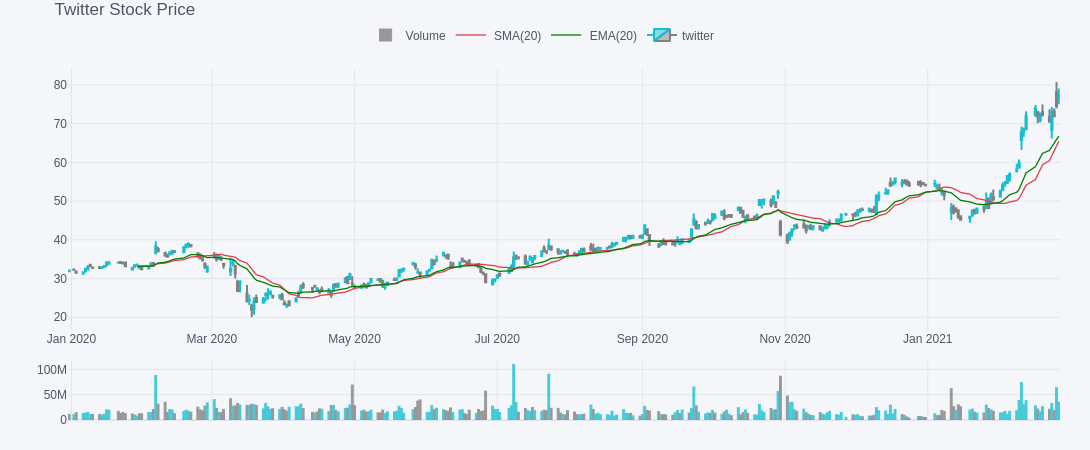

In [2]:
# plotly 활성화 하기
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

# 수집한 데이터를 활용하여 그림 그리기 (1.캔들차트, 2.거래량, 3,4.이동평균 곡선)
qf = cf.QuantFig(df_twiter, title='Twitter Stock Price', legend='top', name='twitter')
qf.add_volume()
qf.add_sma(periods=20, column='Close', color='red')
qf.add_ema(periods=20, color='green')
qf.iplot()

## **2 Back Testing (단순 이동평균 전략)**
기술적 지표 분석을 위한 데이터 수집 및 분석하기

In [6]:
from datetime import datetime
import backtrader as bt

In [ ]:
class SmaSignal(bt.Signal):
    params = (('period', 20), )
    
    def __init__(self):
        self.lines.signal = self.data

In [4]:
! pip install backtrader

     |████████████████████████████████| 410 kB 1.4 MB/s eta 0:00:01
